# Assignment 1

**Alexandra Haslund-Gourley**

Due: Wednesday, Feb 12 2025

TODO: 
- strip away the numbers from the team names. 
- I can only submit one plot and he likes the stacked plot the most 
- check the data that I am plotting 

## Parse the scraped data and load in an interpretable dataframe

In [55]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import re
import seaborn as sns

def generate_df_from_url(url):
    """This function generates a DataFrame from a URL."""
    # Send a GET request
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for bad status codes

    # Parse HTML with BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    print(soup.prettify())
    # Find the table
    table = soup.find("table")

    # Ensure table exists
    if table:
        # Extract table headers
        # _r means the ranking, and SS mean strength of schedule. IDK what NCSOS means 
        headers = ['Rk','Team',	'Conf',	'W-L',	'NetRtg',	'ORtg',	'ORtg_r','DRtg','DRtg_r',	'AdjT','AdjT_r','Luck','Luck_r','SS_NetRtg','SS_NetRtg_r','SS_ORtg','SS_ORtg_r','SS_DRtg','SS_DRtg_r','NCSOS_NetRtg',"NCSOS_NetRtg_r"]


        # Extract table rows
        data = []
        for row in table.find_all("tr")[1:]:  # Skip header row
            cols = [col.text.strip() for col in row.find_all("td")]
            if len(cols) == 21:
                data.append(cols)


        # Create DataFrame
    team_stats = pd.DataFrame(data, columns=headers)
    return team_stats

# URL of the webpage
url_2014 = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/data/2014KenPomeroy.html"
team_stats_2014 = generate_df_from_url(url_2014)

# URL of the webpage
url_2009 = "https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2025/data/2009KenPomeroy.html"
team_stats_2009 = generate_df_from_url(url_2009)





<!DOCTYPE HTML>
<html>
 <head>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <script type="text/javascript">
   $(function() {
        $( 'th' ).tooltip({
            position: {
                my: "center bottom-10",
                at: "center"
            },
            content: function() {
                return $(this).attr('title');
            }
        });
    });
  </script>
  <style>
   .ui-tooltip {
        background: blue;
        color: white;
        padding: 2px;
        text-align:center;
        line-height: 1.2em;
    }
  </style>
  <link href="css/rate2.css?1725252033" rel="stylesheet" type="text/css"/>
  <title>
   2014 Pomeroy College Basketball Ratings
  </title>
  <!-- Google tag (gtag.js) -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-6DKK0E2CDM">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());
  

## Question: 
- how many bins should I give these different plots if they have difference amounts of input data? (sam, or scaled)?

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# def plot_2d_hist(conferences, col_name):
#     # Ensure SS_DRtg is numeric
#     team_stats_2014[col_name] = pd.to_numeric(team_stats_2014[col_name], errors="coerce")
#     team_stats_2014.dropna(subset=[col_name], inplace=True)

#     fig, ax = plt.subplots(figsize=(10, 6), sharex=True) 



#     # Concatenate all valid numeric values for bin edges
#     all_data = np.concatenate([team_stats_2014[team_stats_2014.Conf == conf][col_name].dropna().values for conf in conferences])
#     bin_edges = np.histogram_bin_edges(all_data, bins=10)  # Fixed bins

#     for i, conf in enumerate(conferences):
#         data = team_stats_2014[team_stats_2014.Conf == conf][col_name].dropna().values  # Ensure numeric
#         n_samples = len(data)
#         if n_samples == 0:
#             continue
#         label = f"{conf} n={n_samples}"

#         # Step histogram for better visibility
#         ax.hist(data, bins=bin_edges, alpha=1, histtype='step', edgecolor=colors[i], lw=1)
        
#         # Stacked histogram
#         ax.hist(data, bins=bin_edges, alpha=(5-i) * 0.1, label=label, fill=True, hatch=fill_patterns[i], color=colors[i])

#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.xlabel(f'Adjusted Defense Efficiency {col_name}')
#     plt.ylabel('Frequency')
#     plt.title(f'Adjusted Defense Efficiency {col_name} by Conference')

#     plt.show()


    

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_2d_hist(conferences, col_name, title , save_name = None):
    n_bins = 10
    # Ensure SS_DRtg is numeric
    team_stats_2014[col_name] = pd.to_numeric(team_stats_2014[col_name], errors="coerce")
    team_stats_2014.dropna(subset=[col_name], inplace=True)

    fig, ax = plt.subplots(figsize=(10, 6), sharex=True)

    # Concatenate all valid numeric values for bin edges
    all_data = np.concatenate([team_stats_2014[team_stats_2014.Conf == conf][col_name].dropna().values for conf in conferences])
    bin_edges = np.histogram_bin_edges(all_data, bins=n_bins)  # Fixed bins

    # Prepare data for stacked histogram
    data_list = []
    labels = []
    for i, conf in enumerate(conferences):
        data = team_stats_2014[team_stats_2014.Conf == conf][col_name].dropna().values  # Ensure numeric
        n_samples = len(data)
        if n_samples == 0:
            continue
        data_list.append(data)
        labels.append(f"{conf} n={n_samples}")

    # Plot stacked histogram
    colors = sns.color_palette("bright", len(conferences))
    ax.hist(data_list, bins=bin_edges, alpha=0.7, label=labels, stacked=True, edgecolor='black', color=colors)

    # Add more refined tick marks on the x-axis
    tick_positions = np.arange(bin_edges[0], bin_edges[-1], (bin_edges[-1] - bin_edges[0]) / n_bins)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([f"{tick:.2f}" for tick in tick_positions], rotation=45)

    plt.legend()
    plt.xlabel(f'Adjusted Defense Efficiency {col_name}')
    plt.ylabel('Frequency')
    plt.title(title)

    plt.show()
    if save_name:
        plt.savefig(save_name, dpi=300)

# Example usage
conferences = ["A10", "SEC", "B10", "BSky", "ACC"]
col_name = "DRtg"
plot_2d_hist(conferences, col_name)

TypeError: plot_2d_hist() missing 1 required positional argument: 'title'

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# def plot_3d_histogram(conferences, col_name):
#     # Ensure SS_DRtg is numeric
#     team_stats_2014[col_name] = pd.to_numeric(team_stats_2014[col_name], errors="coerce")
#     team_stats_2014.dropna(subset=[col_name], inplace=True)


#     fig = plt.figure(figsize=(12, 12))
#     ax = fig.add_subplot(211, projection='3d')

#     y_positions = np.arange(len(conferences))  # Offset for each conference

#     for i, conf in enumerate(conferences):
#         data = team_stats_2014[team_stats_2014.Conf == conf][col_name].dropna().values
#         if len(data) == 0:
#             continue

#         bins = np.histogram_bin_edges(data, bins=5)
#         hist, bin_edges = np.histogram(data, bins=bins)

#         x_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of bins
#         y_pos = np.full_like(x_centers, y_positions[i])  # Offset each conf on y-axis

#         ax.bar3d(x_centers, y_pos, np.zeros_like(hist),  # (x, y, bottom)
#                 bin_edges[1] - bin_edges[0],  # Width of bars
#                 0.4,  # Depth (y spacing)
#                 hist,  # Height (z-axis)
#                 color=colors[i], alpha=0.5, label=conf, edgecolor='black',lw=.5)

#     ax.set_xlabel("Adjusted Defense Efficiency “DRtg”")
#     ax.set_ylabel("Conference")
#     ax.set_zlabel("Frequency")
#     ax.set_yticks(y_positions)
#     ax.set_yticklabels(conferences)
#     ax.set_title("Adjusted Defense Efficiency “DRtg”")
#     ax.legend()

#     plt.show()

# def plot_3d_histogram(conferences):
#     # Ensure SS_DRtg is numeric
#     team_stats_2014[col_name] = pd.to_numeric(team_stats_2014[col_name], errors="coerce")
#     team_stats_2014.dropna(subset=[col_name], inplace=True)

#     fig = go.Figure()

#     y_positions = np.arange(len(conferences))  # Offset for each conference

#     for i, conf in enumerate(conferences):
#         data = team_stats_2014[team_stats_2014.Conf == conf][col_name].dropna().values
#         if len(data) == 0:
#             continue

#         bins = np.histogram_bin_edges(data, bins=5)
#         hist, bin_edges = np.histogram(data, bins=bins)

#         x_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of bins
#         y_pos = np.full_like(x_centers, y_positions[i])  # Offset each conf on y-axis

#         for j in range(len(hist)):
#             fig.add_trace(go.Mesh3d(
#                 x=[x_centers[j], x_centers[j], x_centers[j] + (bin_edges[1] - bin_edges[0]), x_centers[j] + (bin_edges[1] - bin_edges[0]),
#                    x_centers[j], x_centers[j], x_centers[j] + (bin_edges[1] - bin_edges[0]), x_centers[j] + (bin_edges[1] - bin_edges[0])],
#                 y=[y_pos[j], y_pos[j] + 0.4, y_pos[j] + 0.4, y_pos[j], y_pos[j], y_pos[j] + 0.4, y_pos[j] + 0.4, y_pos[j]],
#                 z=[0, 0, 0, 0, hist[j], hist[j], hist[j], hist[j]],
#                 color='blue',
#                 opacity=0.5,
#                 name=conf
#             ))

#     fig.update_layout(
#         scene=dict(
#             xaxis_title="Adjusted Defense Efficiency “DRtg”",
#             yaxis_title="Conference",
#             zaxis_title="Frequency",
#             yaxis=dict(
#                 tickvals=y_positions,
#                 ticktext=conferences
#             )
#         ),
#         title="Adjusted Defense Efficiency “DRtg”",
#         legend_title="Conference"
#     )

#     fig.show()


### Excersize 2: 
Take the 2014 and 2009 Ken Pomeroy data related to
NCAA College Basketball analytics
1. Calculate the difference in “ORtg” for all the teams in the 5 conferences from Exercise 1:
    - 2014 minus 2009 as a function of the 2009 ORtg value
    - Plot the data as a graph with a data point for each team entry being the same conference color as for the previous histogram in Exercise 1
    
2. Calculate the median and mean of the difference in “ORtg” between 2009 and 2014:
    - For each of the 5 conferences (there should be a median and a meanfor each conference)
    - For all teams that were not in the 5 conferences Exercise 2 (4pts.)



In [119]:
def compute_stats(conferences,stat_to_compare = 'ORtg'):
    # strip the numbers from the team names
    team_stats_2014['Team'] = team_stats_2014['Team'].apply(lambda x: re.sub(r'\s*\d+', '', x))
    team_stats_2009['Team'] = team_stats_2009['Team'].apply(lambda x: re.sub(r'\s*\d+', '', x))
    # # align the teams in the team_states-2009 and team_states_2014
    # shared_teams = team_stats_2014['Team'].isin(team_stats_2009['Team'])
    # print("Number of overlapping teams", len(np.argwhere(shared_teams==True)))
    # print("Non overlapping teams: ", team_stats_2014['Team'][~shared_teams].sort_values().values)
    # print("Number of non-overlapping teams", len(np.argwhere(shared_teams==False)))
    # print("Total teams from 2014: ", len(team_stats_2014), "unique_teams:", len(team_stats_2014['Team'].unique()))
    # print("Total teams from 2009: ", len(team_stats_2009), "unique_teams:", len(team_stats_2009['Team'].unique()))

    # # merge the two dataframes on the team name:
    # team_stats = pd.merge(team_stats_2009,team_stats_2014,  on='Team', suffixes=('_2009', '_2014'))

    
    # team_stats[stat_to_compare + '_2009'] = pd.to_numeric(team_stats[stat_to_compare + '_2009'], errors="coerce")
    # team_stats[stat_to_compare + '_2014'] = pd.to_numeric(team_stats[stat_to_compare + '_2014'], errors="coerce")
    # team_stats[stat_to_compare+"_difference"] = team_stats[stat_to_compare + '_2014'] - team_stats[stat_to_compare + '_2009']
    difference_stats = []
    teams_in_main_conference = []
    for conf in conferences:

        # for each conference in 2014, grab the teams that played. Then find those teams (regardless of the confernce) in 2009 and compare the stats.
        teams_2014 = team_stats_2014.loc[team_stats_2014['Conf'] == conf]

        sub_set_2014_conf_in_2009 = team_stats_2009.loc[team_stats_2009['Team'].isin(teams_2014.Team.values)]

        print("Conference: ", conf)
        print(f"2014 teams in conference {conf}: {len(teams_2014)}, 2009 teams in conference {conf}: {len(sub_set_2014_conf_in_2009)}")
        print(f"non overlapping teams: {len(teams_2014)-len(sub_set_2014_conf_in_2009)}, {teams_2014[~teams_2014['Team'].isin(sub_set_2014_conf_in_2009['Team'])]}")


        stats_conf_2009 =pd.to_numeric(sub_set_2014_conf_in_2009[stat_to_compare].values)
        stats_conf_2014 = pd.to_numeric(teams_2014[stat_to_compare].values)

        diff = stats_conf_2014 - stats_conf_2009

        mean = np.mean(diff)
        median = np.median(diff)
        difference_stats.append([conf,diff,stats_conf_2009, mean, median])

        print("Mean of the difference: ", np.mean(diff))
        print("Median of the difference: ", np.median(diff))
        # save list of teams in the 2014 conference
        teams_in_main_conference.extend(teams_2014.Team.values)
    difference_stats = pd.DataFrame(difference_stats, columns=['Conference',"Diff","values_2009", 'Mean', 'Median'])

    """Plot the Scatter Plot of the differences"""
    # Set a consistent color palette
    colors = sns.color_palette("bright", len(conferences))

    fig = plt.figure(figsize=(10, 8))
    for i, conf in enumerate(conferences):
        data = difference_stats[difference_stats.Conference == conf]
        if len(data) == 0:
            continue

        plt.scatter(data.values_2009, data.Diff, label=conf, color=colors[i], alpha=0.7, edgecolors='w', s=100)

    plt.xlabel(stat_to_compare + ' 2009 Value', fontsize=14)
    plt.ylabel(stat_to_compare + ' Difference 2014-2009', fontsize=14)
    plt.hlines(0, 80, 130, color='black', linestyle='--', label = "No Change")
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=12)
    plt.title("Comparison of " + stat_to_compare + " between 2009 and 2014", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add more ticks to the x-axis and y-axis
    x_ticks = np.arange(80,130,5)#np.linspace(80, 130, num=10)  # Adjust the range and number of ticks as needed
    y_ticks = np.arange(-15,16,1) #np.linspace(-12,12, num=24)  # Adjust the range and number of ticks as needed

    plt.xticks(x_ticks)
    plt.yticks(y_ticks)

    plt.show()


    """Calcualte and plot the mean and median values"""
    # teams that were in these 5 conferences: 
    # data_to_save = []
    # for i, conf in enumerate(conferences):
    #     data = team_stats[team_stats.Conf_2009 == conf]
    #     mean = np.mean(data[stat_to_compare+"_difference"])
    #     median = np.median(data[stat_to_compare+"_difference"])
    #     data_to_save.append([conf, mean, median])

    # all other conferences: 
    other_teams_2014 = pd.to_numeric(team_stats_2014.loc[~team_stats_2014['Team'].isin(teams_in_main_conference)][stat_to_compare].values)
    other_teams_2009 = pd.to_numeric(team_stats_2009.loc[~team_stats_2009['Team'].isin(teams_in_main_conference)][stat_to_compare].values)

    diff = other_teams_2014 - other_teams_2009

    mean = np.mean(diff)
    median = np.median(diff)
    difference_stats.append(["All Others",diff,other_teams_2014, mean, median])
    
    # all_other_mean = other_conferences[stat_to_compare+"_difference"].mean()
    # all_other_median = other_conferences[stat_to_compare+"_difference"].median()
    # data_to_save.append(["All Others", all_other_mean, all_other_median])

    # data_to_save = pd.DataFrame(data_to_save, columns=['Conference', 'Mean', 'Median'])
    # print("Analysis of " + stat_to_compare + " for 2009 and 2014")
    # display(data_to_save)

    """Plot a figure of the mean and median values"""
    fig = plt.figure(figsize=(10, 8))

    # Define the width of the bars
    bar_width = 0.4

    # Calculate the positions for the bars
    indices = np.arange(len(difference_stats['Conference']))

    # Plot the bars for mean and median next to each other
    plt.bar(indices - bar_width/2, difference_stats['Mean'], width=bar_width, alpha=0.7, label='Mean', color='blue')
    plt.bar(indices + bar_width/2, difference_stats['Median'], width=bar_width, alpha=0.7, label='Median', color='red')

    # Set the x-axis labels and positions
    plt.xlabel('Conference', fontsize=14)
    plt.ylabel('Difference in ' + stat_to_compare, fontsize=14)
    plt.title('Mean and Median Difference in ' + stat_to_compare + ' between 2009 and 2014', fontsize=16)
    plt.xticks(indices, difference_stats['Conference'], rotation=45)

    # Add legend and grid
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()
        

    # # repeat for al of the teams that were not in these 5 conferences: 
    # all_other_conferences = set(team_stats['Conf_2009'].unique())-set(conferences)

    # data_to_save = []

    # for i, conf in enumerate(all_other_conferences):
    #     data = team_stats[team_stats.Conf_2009 == conf]
    #     mean = np.mean(data[stat_to_compare+"_difference"])
    #     median = np.median(data[stat_to_compare+"_difference"])
    #     data_to_save.append([conf, mean, median])


    # data_to_save = pd.DataFrame(data_to_save, columns=['Conference', 'Mean', 'Median'])
    # print("ALL OTHER CONFERENCES: Analysis of " + stat_to_compare + " for 2009 and 2014")
    # display(data_to_save)

    # # perhaps he just wants all the other teams together: 
    # data = team_stats[~team_stats['Conf_2009'].isin(conferences)]
    # mean = np.mean(data[stat_to_compare+"_difference"])
    # median = np.median(data[stat_to_compare+"_difference"])
    # print("Mean of all other teams: ", mean)
    # print("Median of all other teams: ", median)
    return difference_stats

# Find the mean and median difference for all of the teams: 

In [120]:
conf = "ACC"
stat = "ORtg"
# for each conference in 2014, grab the teams that played. Then find those teams (regardless of the confernce) in 2009 and compare the stats.
teams_2014 = team_stats_2014.loc[team_stats_2014['Conf'] == conf]

sub_set_2014_conf_in_2009 = team_stats_2009.loc[team_stats_2009['Team'].isin(teams_2014.Team.values)]


stats_conf_2009 =pd.to_numeric(sub_set_2014_conf_in_2009[stat].values)
stats_conf_2014 = pd.to_numeric(teams_2014[stat].values)

diff = stats_conf_2014 - stats_conf_2009

mean = np.mean(diff)
median = np.median(diff)

print("Mean of the difference: ", np.mean(diff))
print("Median of the difference: ", np.median(diff))


Mean of the difference:  -1.0466666666666697
Median of the difference:  -0.7999999999999972


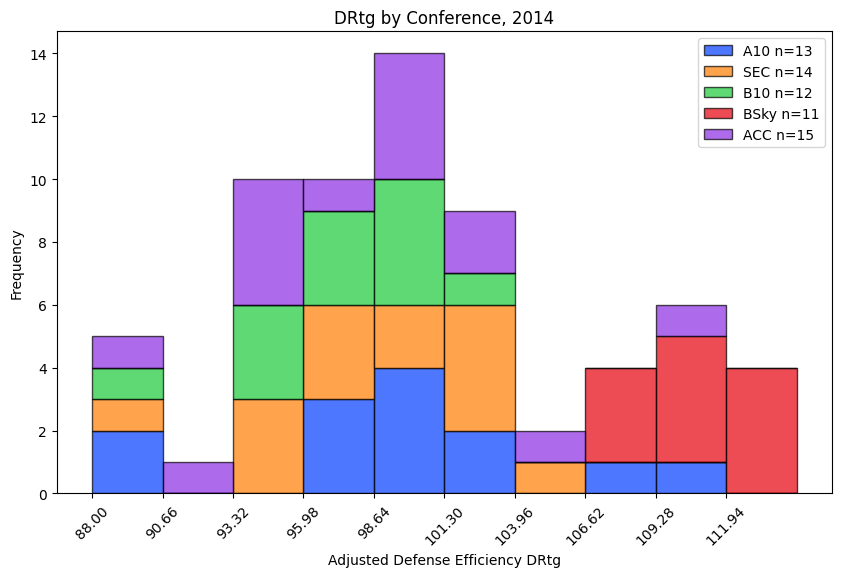

Conference:  A10
2014 teams in conference A10: 13, 2009 teams in conference A10: 13
non overlapping teams: 0, Empty DataFrame
Columns: [Rk, Team, Conf, W-L, NetRtg, ORtg, ORtg_r, DRtg, DRtg_r, AdjT, AdjT_r, Luck, Luck_r, SS_NetRtg, SS_NetRtg_r, SS_ORtg, SS_ORtg_r, SS_DRtg, SS_DRtg_r, NCSOS_NetRtg, NCSOS_NetRtg_r]
Index: []

[0 rows x 21 columns]
Mean of the difference:  3.6923076923076925
Median of the difference:  3.5999999999999943
Conference:  SEC
2014 teams in conference SEC: 14, 2009 teams in conference SEC: 14
non overlapping teams: 0, Empty DataFrame
Columns: [Rk, Team, Conf, W-L, NetRtg, ORtg, ORtg_r, DRtg, DRtg_r, AdjT, AdjT_r, Luck, Luck_r, SS_NetRtg, SS_NetRtg_r, SS_ORtg, SS_ORtg_r, SS_DRtg, SS_DRtg_r, NCSOS_NetRtg, NCSOS_NetRtg_r]
Index: []

[0 rows x 21 columns]
Mean of the difference:  0.9428571428571441
Median of the difference:  1.8999999999999986
Conference:  B10
2014 teams in conference B10: 12, 2009 teams in conference B10: 12
non overlapping teams: 0, Empty DataFram

ValueError: operands could not be broadcast together with shapes (11,) (10,) 

<Figure size 640x480 with 0 Axes>

In [121]:
fill_patterns = ["","","","","","",""]#["\\", "//", "/", "", "", "", '|', '-', '+', 'x', 'o', 'O', '.', '*']
colors = ['blue', 'red', 'green', 'purple', 'orange', "pink"]
conferences1 = ["A10", "SEC", "B10", "BSky", "ACC"]
col_name = "DRtg"
plot_2d_hist(conferences1,col_name, title = f"{col_name} by Conference, 2014", save_name = "5_conference_hist.png")
#plot_3d_histogram(conferences1,col_name)
difference_stats = compute_stats(conferences1)

print("repeating for new conferences")
conferences2 = ["A10", "SEC", "B10", "BSky", "ACC", "BE"]
plot_2d_hist(conferences2,col_name,title = f"{col_name} by Conference, 2014")
#plot_3d_histogram(conferences2,col_name)
difference_stats = compute_stats(conferences2)


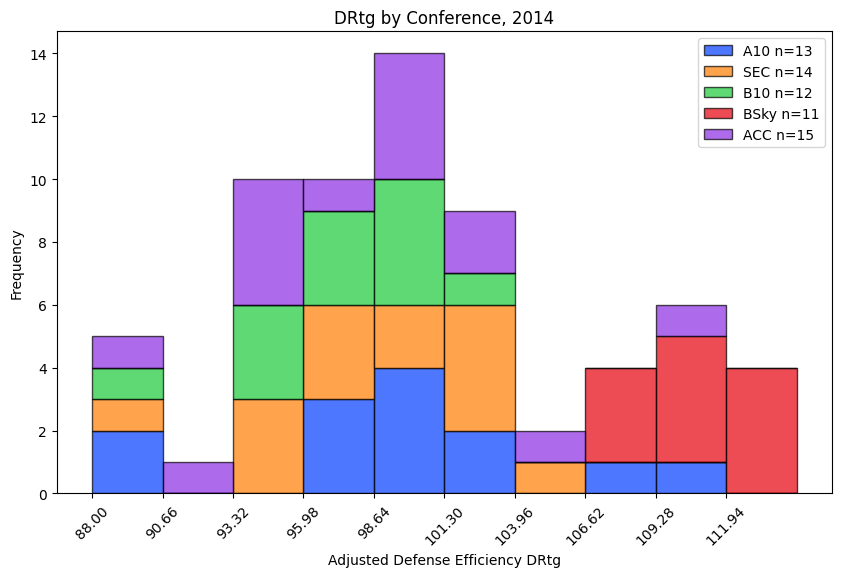

Teams in 2014 but not in 2009: {'North Dakota'}
Teams in 2014 but not in 2009: set()


,Conference,Mean,Median
0,A10,3.692308,3.90
1,SEC,0.942857,0.80
2,B10,2.891667,4.80
3,BSky,0.620000,1.85
4,ACC,-1.046667,-1.50
5,All Others,2.572662,1.85


<Figure size 640x480 with 0 Axes>

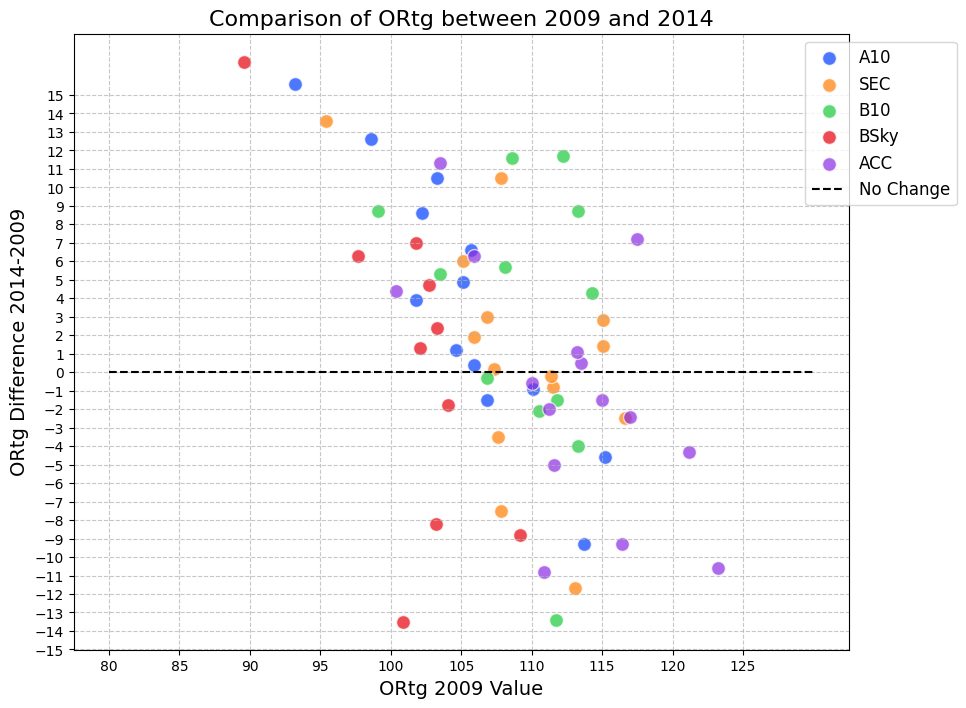

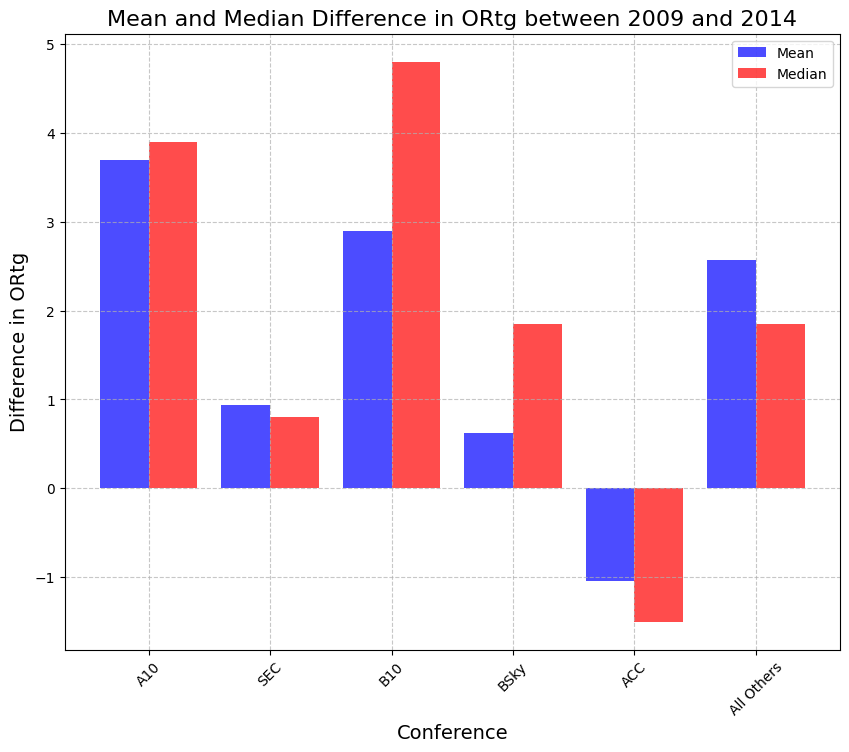

repeating for new conferences


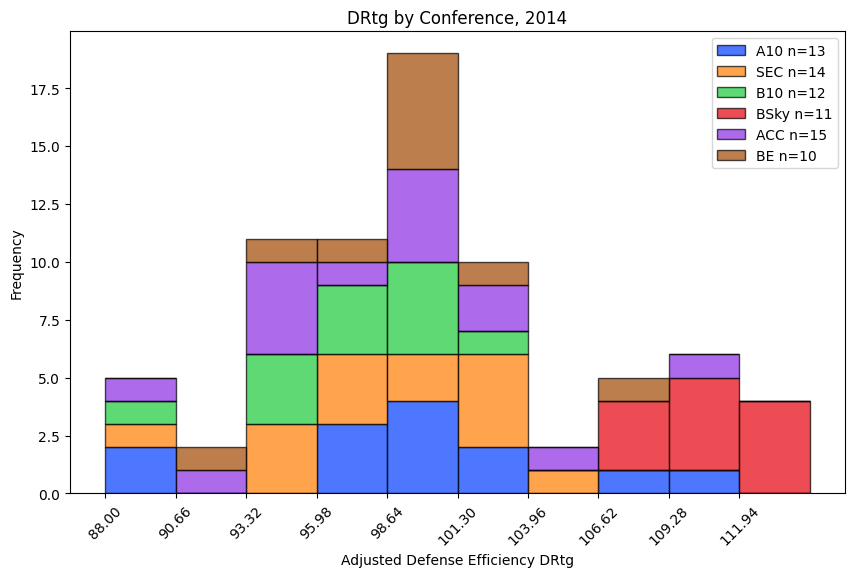

Teams in 2014 but not in 2009: {'North Dakota'}
Teams in 2014 but not in 2009: set()


,Conference,Mean,Median
0,A10,3.692308,3.90
1,SEC,0.942857,0.80
2,B10,2.891667,4.80
3,BSky,0.620000,1.85
4,ACC,-1.046667,-1.50
5,BE,1.790000,1.90
6,All Others,2.601866,2.25


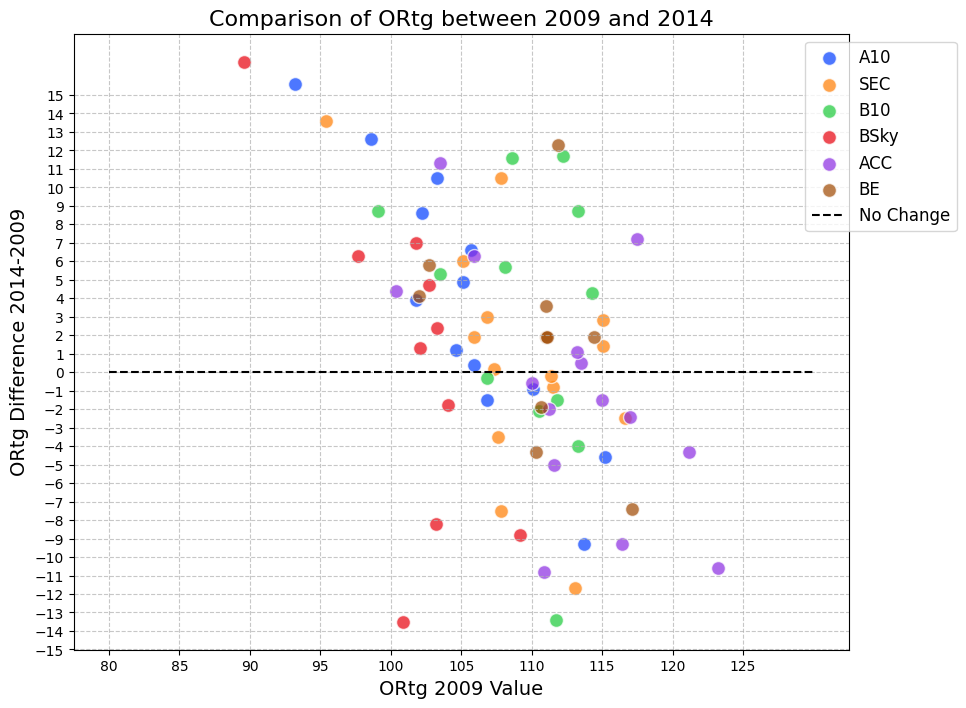

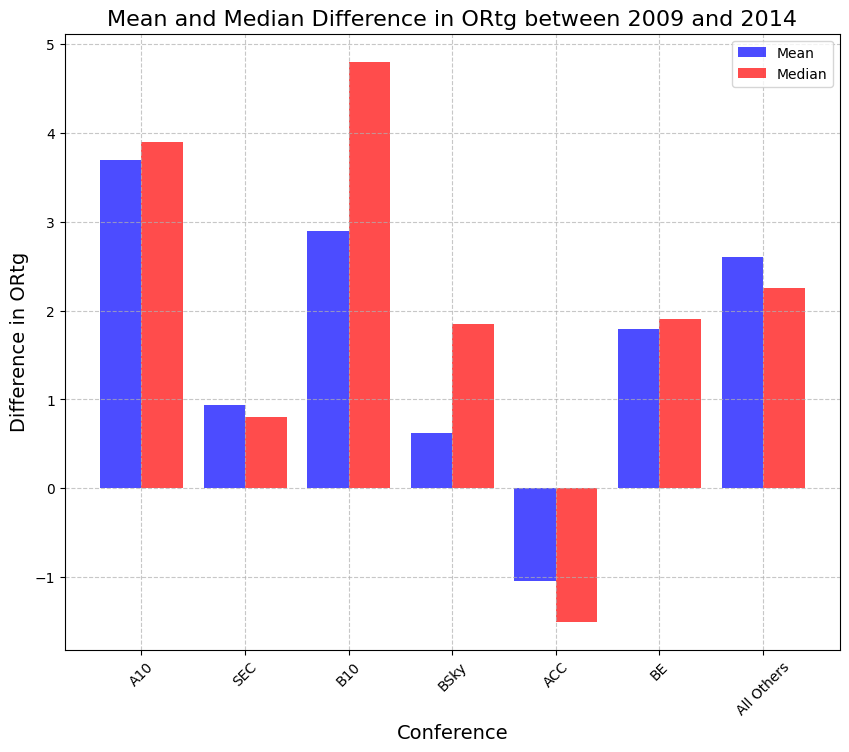

In [153]:
def compute_stats(conferences,stat_to_compare = 'ORtg'):
    # strip the numbers from the team names
    team_stats_2014['Team'] = team_stats_2014['Team'].apply(lambda x: re.sub(r'\s*\d+', '', x))
    team_stats_2009['Team'] = team_stats_2009['Team'].apply(lambda x: re.sub(r'\s*\d+', '', x))
    
    difference_stats = []
    teams_in_main_conference = []
    for conf in conferences:
        # for each conference in 2014, grab the teams that played. Then find those teams (regardless of the confernce) in 2009 and compare the stats.
        teams_2014 = team_stats_2014.loc[team_stats_2014['Conf'] == conf] # teams from 2014
        team_2014_names = teams_2014.Team.values    # find the 2014 names
        teams_2014_names_in_2009 = team_stats_2009.loc[team_stats_2009['Team'].isin(team_2014_names)].Team.values # find the 2009 names

        # check if there are no non-overlapping names: 
        if set(team_2014_names) != set(teams_2014_names_in_2009):
            print(f"Teams in 2014 but not in 2009: {set(team_2014_names) - set(teams_2014_names_in_2009)}")
            # just find the union of the sets: 
            team_2014_names = set(team_2014_names).intersection(set(teams_2014_names_in_2009))
            # if we don't have all of the 2014 names in 2009, we will just set the 2014 names to the 2009 names
            teams_2014_names_in_2009 = team_2014_names
            teams_2014 = team_stats_2014.loc[team_stats_2014['Team'].isin(team_2014_names)] # reset the team stats to only include the overlapping names

       # using the shared names, pull them out: 
        values_2014 = pd.to_numeric(team_stats_2014.loc[team_stats_2014['Team'].isin(team_2014_names)][stat_to_compare].values)

        values_2009 = []
        # get the values in 2009: 
        for team in team_2014_names:
            val_2009  = pd.to_numeric(team_stats_2009.loc[team_stats_2009['Team'] == team][stat_to_compare].values[0])
            values_2009.append(val_2009)


        diff = values_2014 - values_2009

        mean = np.mean(diff)
        median = np.median(diff)
        difference_stats.append([conf,diff,values_2009, mean, median])

        teams_in_main_conference.extend(team_2014_names)

    # all other conferences: 
    other_teams_2014 = team_stats_2014.loc[~team_stats_2014['Conf'].isin(conferences)] # teams from 2014
    # find the team names for teams that were not in a list of conferences: 
    other_team_names =other_teams_2014.Team.values
    teams_2014_names_in_2009 = team_stats_2009.loc[team_stats_2009['Team'].isin(other_team_names)].Team.values # find the 2009 names

    # check if there are no non-overlapping names: 
    if set(teams_2014_names_in_2009) != set(other_team_names):
        print(f"Teams in 2014 but not in 2009: {set(teams_2014_names_in_2009) - set(other_team_names)}")
        # just find the union of the sets: 
        other_team_names = set(other_team_names).intersection(set(teams_2014_names_in_2009))

        teams_2014 = team_stats_2014.loc[team_stats_2014['Team'].isin(other_team_names)] # reset the team stats to only include the overlapping names

       # using the shared names, pull them out: 
        values_2014 = pd.to_numeric(team_stats_2014.loc[team_stats_2014['Team'].isin(other_team_names)][stat_to_compare].values)
        values_2009 = []
        # get the values in 2009: 
        for team in other_team_names:

            val_2009  = pd.to_numeric(team_stats_2009.loc[team_stats_2009['Team'] == team][stat_to_compare].values[0])
            values_2009.append(val_2009)


        diff = values_2014 - values_2009

        mean = np.mean(diff)
        median = np.median(diff)
        #difference_stats.append([conf,diff,values_2009, mean, median])
    difference_stats.append(["All Others",diff,values_2014, mean, median])

    difference_stats = pd.DataFrame(difference_stats, columns=['Conference',"Diff","values_2009", 'Mean', 'Median'])

    display(difference_stats[['Conference', 'Mean', 'Median']])
    
    """Plot the Scatter Plot of the differences"""
    # Set a consistent color palette
    colors = sns.color_palette("bright", len(conferences))
    
    fig = plt.figure(figsize=(10, 8))
    for i, conf in enumerate(conferences):
        data = difference_stats[difference_stats.Conference == conf]

        if len(data) == 0:
            continue

        plt.scatter(data.values_2009.values[0], data.Diff.values[0], label=conf, color=colors[i], alpha=0.7, edgecolors='w', s=100)
    plt.xlabel(stat_to_compare + ' 2009 Value', fontsize=14)
    plt.ylabel(stat_to_compare + ' Difference 2014-2009', fontsize=14)
    plt.hlines(0, 80, 130, color='black', linestyle='--', label = "No Change")
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=12)
    plt.title("Comparison of " + stat_to_compare + " between 2009 and 2014", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    # Add more ticks to the x-axis and y-axis
    x_ticks = np.arange(80,130,5)#np.linspace(80, 130, num=10)  # Adjust the range and number of ticks as needed
    y_ticks = np.arange(-15,16,1) #np.linspace(-12,12, num=24)  # Adjust the range and number of ticks as needed
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.show()


    
    
    """Plot a figure of the mean and median values"""
    fig = plt.figure(figsize=(10, 8))

    # Define the width of the bars
    bar_width = 0.4

    # Calculate the positions for the bars
    indices = np.arange(len(difference_stats['Conference']))

    # Plot the bars for mean and median next to each other
    plt.bar(indices - bar_width/2, difference_stats['Mean'], width=bar_width, alpha=0.7, label='Mean', color='blue')
    plt.bar(indices + bar_width/2, difference_stats['Median'], width=bar_width, alpha=0.7, label='Median', color='red')

    # Set the x-axis labels and positions
    plt.xlabel('Conference', fontsize=14)
    plt.ylabel('Difference in ' + stat_to_compare, fontsize=14)
    plt.title('Mean and Median Difference in ' + stat_to_compare + ' between 2009 and 2014', fontsize=16)
    plt.xticks(indices, difference_stats['Conference'], rotation=45)

    # Add legend and grid
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
        
    return difference_stats


conferences1 = ["A10", "SEC", "B10", "BSky", "ACC"]
col_name = "DRtg"
plot_2d_hist(conferences1,col_name, title = f"{col_name} by Conference, 2014", save_name = "5_conference_hist.png")
#plot_3d_histogram(conferences1,col_name)
difference_stats = compute_stats(conferences1)

print("repeating for new conferences")
conferences2 = ["A10", "SEC", "B10", "BSky", "ACC", "BE"]
plot_2d_hist(conferences2,col_name,title = f"{col_name} by Conference, 2014")
#plot_3d_histogram(conferences2,col_name)
difference_stats = compute_stats(conferences2)

In [261]:
# importing required modules
from pypdf import PdfReader

# creating a pdf reader object
reader = PdfReader('authors-acknowledgements-v5.pdf')

# printing number of pages in pdf file
print(len(reader.pages))

# getting a specific page from the pdf file
page = reader.pages[0]

# extracting text from page
text = page.extract_text()



# load many pages
text = ""
for page in reader.pages:
    text += page.extract_text()


# grab just the names: 
text = text.split("(SKA S OUTH AFRICA / MEER KAT)")[0]
text = text.split("MULTI-MESSENGER OBSERV ATIONS OF A BINARY NEUTRON STAR MERGER")[1]
print(text)


37

B. P. A BBOTT ,1 R. A BBOTT ,1 T. D. A BBOTT ,2 F. ACERNESE ,3, 4 K. ACKLEY ,5, 6 C. A DAMS ,7 T. ADAMS ,8 P. ADDESSO ,9
R. X. A DHIKARI ,1 V. B. ADYA,10 C. A FFELDT ,10 M. A FROUGH ,11 B. AGARWAL ,12 M. AGATHOS ,13 K. AGATSUMA ,14
N. AGGARWAL ,15 O. D. A GUIAR ,16 L. A IELLO ,17, 18 A. A IN,19 P. AJITH ,20 B. A LLEN ,10, 21, 22 G. A LLEN ,12 A. A LLOCCA ,23, 24
P. A. A LTIN ,25 A. A MATO,26 A. A NANYEVA ,1 S. B. A NDERSON ,1 W. G. A NDERSON ,21 S. V. ANGELOVA ,27 S. A NTIER ,28 S. A PPERT ,1
K. A RAI ,1 M. C. A RAYA,1 J. S. A REEDA ,29 N. A RNAUD ,28, 30 K. G. A RUN ,31 S. A SCENZI ,32, 33 G. A SHTON ,10 M. A ST,34
S. M. A STON ,7 P. ASTONE ,35 D. V. ATALLAH ,36 P. AUFMUTH ,22 C. AULBERT ,10 K. AULTONEAL ,37 C. AUSTIN ,2
A. AVILA -ALVAREZ ,29 S. BABAK ,38 P. BACON ,39 M. K. M. B ADER ,14 S. BAE,40 P. T. BAKER ,41 F. BALDACCINI ,42, 43
G. BALLARDIN ,30 S. W. B ALLMER ,44 S. BANAGIRI ,45 J. C. B ARAYOGA ,1 S. E. B ARCLAY ,46 B. C. B ARISH ,1 D. BARKER ,47
K. BARKETT ,48 F. BARONE ,3

In [286]:


# Extract the last names
last_names = []
first_initial_list = []
second_initial_list = []

for name in text.split(","):
    #Strip the numbers from the names
    name = re.sub(r'\s*\d+', '', name)

    # Strip the extra spaces and commas from the names
    name = re.sub(r'\s*,\s*', ',', name)

    # Remove spaces within the last names
    name = re.sub(r'\s+', ' ', name)
    name = re.sub(r'AND', ' ', name)
    name = re.sub(r'\(.*?\)', '', name)
    name = re.sub(r' ', '', name)
    first_name = name.split(". ")[:-1]#.strip("AND")
    last_name = name.split(". ")[-1].strip("\n")
    full_name = re.sub(r'\s+', '', last_name) 
    last_name = full_name.split(".")[-1]

    if len(full_name.split(".")) == 2:
        first_initial = full_name.split(".")[0]
        second_initial = ""
    if len(full_name.split(".")) == 3:
        first_initial = full_name.split(".")[0]
        second_initial = full_name.split(".")[1]
   
# Remove spaces within the last name
    if "AND" in last_name:
        last_name = last_name.split("AND")[0]   
    if len(last_name) == 0 & len(first_name) == 0: 
        continue
    else: 
        first_initial_list.append(first_initial)
        second_initial_list.append(second_initial)
        last_names.append(last_name)


print(len(last_names))
print(len(first_initial_list))
print(len(second_initial_list))
# Create a DataFrame from the extracted names
author_names = pd.DataFrame({
    "First Initial": first_initial_list,
    "Second Initial": second_initial_list,
    "Last Name": last_names
})
print("Initial Names: ", len(author_names))
print("repeated names: ", len(author_names)-len(author_names.drop_duplicates()))



"""
How many unique authors are there in that list?
• If there was one single author list in alphabetical order (instead of
being grouped by experimental collaboration), what author is the mid-
point.
• What is author at the location (total authors)/2? Potentially there are two authors
depending on whether the total number of authors is an odd or even number.
• Sort by last name and then first initial(s).
Exercise 4 (Extra 1pt.)
12
"""
# find the unique authors: 
unique_authors = author_names.drop_duplicates()
print(len(unique_authors), len(author_names))

unique_authors = unique_authors.sort_values(by = ['Last Name', 'First Initial', 'Second Initial'])
print("indix is: ", len(unique_authors)//2)
print('')
print(unique_authors.iloc[len(unique_authors)//2])
print('')
print('')
# print("index is: ", len(unique_authors)//2+1 ,unique_authors.iloc[len(unique_authors)//2+1])
# print('')
print('')
print("index is: ",len(unique_authors)//2-1, unique_authors.iloc[len(unique_authors)//2-1])

display(unique_authors)

3561
3561
3561
Initial Names:  3561
repeated names:  87
3474 3561
indix is:  1737

First Initial           S
Second Initial           
Last Name         LEURINI
Name: 2000, dtype: object



index is:  1736 First Initial             M
Second Initial             
Last Name         LEUERMANN
Name: 1309, dtype: object


,First Initial,Second Initial,Last Name
3092,H,,AAB
1146,R,,AARTSEN
0,B,P,ABBOTT
1,R,,ABBOTT
2,T,D,ABBOTT
...,...,...,...
1707,J,D,ZORNOZA
3479,F,,ZUCCARELLO
1100,M,E,ZUCKER
3407,R,,ˇSM´IDA


In [288]:
unique_authors = unique_authors.sort_values(by = ['First Initial', 'Second Initial','Last Name', ])
print("indix is: ", len(unique_authors)//2)
print('')
print(unique_authors.iloc[len(unique_authors)//2])
print('')
print('')
# print("index is: ", len(unique_authors)//2+1 ,unique_authors.iloc[len(unique_authors)//2+1])
# print('')
print('')
print("index is: ",len(unique_authors)//2-1, unique_authors.iloc[len(unique_authors)//2-1])

display(unique_authors)

indix is:  1737

First Initial           K
Second Initial           
Last Name         MEAGHER
Name: 1322, dtype: object



index is:  1736 First Initial                K
Second Initial                
Last Name         MATSUBAYASHI
Name: 2311, dtype: object


,First Initial,Second Initial,Last Name
2718,A,,ABRAMOWSKI
18,A,,AIN
2985,A,,ALBERT
22,A,,ALLOCCA
3098,A,,ALMELA
...,...,...,...
2916,Ł,,STAWARZ
2592,Ł,,WYRZYKOWSKI
2294,‡S,,BAAR
368,∗G,,GEMME


In [280]:
# save the data frame: 
unique_authors.to_csv("unique_authors.csv", index = False)
unique_authors

,First Initial,Second Initial,Last Name
3092,H,,AAB
1146,R,,AARTSEN
0,B,P,ABBOTT
1,R,,ABBOTT
2,T,D,ABBOTT
...,...,...,...
1707,J,D,ZORNOZA
3479,F,,ZUCCARELLO
1100,M,E,ZUCKER
3407,R,,ˇSM´IDA


In [265]:
import re
import pandas as pd

# # Example text from the document
# text = """ G. AARTSEN,182 M. ACKERMANN,183 J. ADAMS,184 J. A. AGUILAR,185 M. AHLERS,186 M. AHRENS,187 I. AL SAMARAI,188
# D. ALTMANN,189 K. ANDEEN,190 T. ANDERSON,191 I. ANSSEAU,185 G. ANTON,189 C. ARGÜELLES,192 J. AUFFENBERG,193
# S. AXANI,192 H. BAGHERPOUR,184 X. BAI,194 J. P. BARRON,195 S. W. BARWICK,196 V. BAUM,197 R. BAY,198 J. J. BEATTY,199, 200"""

# Lists to store extracted names
first_initial_list = []
second_initial_list = []
last_names = []

# Split by commas to get individual author entries
for name in text.split(","):
    # Remove numeric citations
    name = re.sub(r'\d+', '', name).strip()
    
    # Remove extra spaces and normalize whitespace
    name = re.sub(r'\s+', ' ', name)
    
    # Improved regex to capture first initial, optional second initial, and last name
    match = re.match(r'^\s*([A-Z])(?:\. ([A-Z])\.)? ([A-Z-]+(?:\s[A-Z-]+)?)$', name)

    if match:
        first_initial = match.group(1)  # First initial
        second_initial = match.group(2) if match.group(2) else ""  # Second initial (if present)
        last_name = match.group(3)  # Last name

        # Store extracted data
        first_initial_list.append(first_initial)
        second_initial_list.append(second_initial)
        last_names.append(last_name)

# Create DataFrame
author_names = pd.DataFrame({
    "First Initial": first_initial_list,
    "Second Initial": second_initial_list,
    "Last Name": last_names
})

# Display first few entries
print(author_names.head(10))

unique_authors = author_names.sort_values(by = ['Last Name', 'First Initial', 'Second Initial'])

print(len(unique_authors), len(author_names))

  First Initial Second Initial  Last Name
0             B              P    A BBOTT
1             T              D    A BBOTT
2             R              X  A DHIKARI
3             V              B       ADYA
4             O              D    A GUIAR
5             P              A     A LTIN
6             S              B  A NDERSON
7             W              G  A NDERSON
8             S              V   ANGELOVA
9             M              C     A RAYA
812 812
